In [45]:
# --- Step 1: Import libraries ---
import pandas as pd          
import numpy as np           
import matplotlib.pyplot as plt  
import seaborn as sns           

%matplotlib inline

print("Libraries imported successfully!")



Libraries imported successfully!


In [46]:
file_path = "/Users/xuejunchen/Desktop/阿冈实验室/fireAID/chopoffdata/data from Das/AK_fire_location_points_NAD83.csv"

df = pd.read_csv(file_path)
df.head()


/var/folders/w4/0226z4g57m5062yqsrt25s6w0000gn/T/ipykernel_4277/188579624.py:3: DtypeWarning: Columns (13,18,20,33,34,38,45,46,47,49,50,51,52,55,57,58,61,62,63,66,70,71,72,73,75,76,77,78,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,ID,NAME,FIRESEASON,FIRESEASONS,LASTUPDATETIME,MGMTORGID,MGMTOFFICEID,MGMTOPTIONID,PRESCRIBEDFIRE,LATITUDE,...,ISVALID,MERGEDINTO,MERGEDDATE,MERGED_REL_IRWINIRID,COMPLEX_REL_IRWINIRID,FIRECAUSE,ISQUARANTINED,CERTIFIED_IN_INFORM,WCE_INCIDENTID,MGMTOPTION_PROTDATE
0,70699,CRS GLENNALLEN FUELS BREAK RX,2024,2020 - 2029,1/2/2025 10:02:01,DOF,CRS,Critical,Y,62.091990,...,true,NaN,NaN,NaN,NaN,Undetermined,NaN,False,0868a5f7-fc18-4c0d-9eac-99ead46f8cb3,Critical
1,70698,CRS RX EFF FUELS SUPPORT,2024,2020 - 2029,1/2/2025 10:01:56,DOF,CRS,Critical,Y,62.091990,...,true,NaN,NaN,NaN,NaN,Undetermined,NaN,False,99a340a9-148c-4afa-8563-74d06260709f,Critical
2,70697,Eielson Avenue,2024,2020 - 2029,12/31/2024 09:01:55,DOF,DAS,Critical,N,64.072975,...,true,NaN,NaN,NaN,NaN,Human,False,True,b85c0a51-e7d3-4b44-a235-ec387686334d,Critical
3,70696,Denali Rx Fall,2024,2020 - 2029,10/31/2024 16:07:44,AFS,TAD,Critical,Y,63.733600,...,true,NaN,NaN,NaN,NaN,Human,NaN,False,f8e3c5a1-f639-43e7-a3a2-7a7886bee7a3,Critical
4,70693,Billie June Road,2024,2020 - 2029,10/26/2024 09:58:14,DOF,DAS,Critical,N,63.956644,...,true,NaN,NaN,NaN,NaN,Human,False,True,8b43d972-0552-4c61-922f-8f58365dd7b9,Critical


In [11]:
#------- Step 3: Check the general structure of data -------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35591 entries, 0 to 35590
Data columns (total 84 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35591 non-null  int64  
 1   NAME                     35574 non-null  object 
 2   FIRESEASON               35591 non-null  int64  
 3   FIRESEASONS              35589 non-null  object 
 4   LASTUPDATETIME           35591 non-null  object 
 5   MGMTORGID                20255 non-null  object 
 6   MGMTOFFICEID             34553 non-null  object 
 7   MGMTOPTIONID             35589 non-null  object 
 8   PRESCRIBEDFIRE           35591 non-null  object 
 9   LATITUDE                 35591 non-null  float64
 10  LONGITUDE                35591 non-null  float64
 11  MAPNAME                  34170 non-null  object 
 12  MAPNUMBER                0 non-null      float64
 13  NEARESTWEATHERSTA        2223 non-null   object 
 14  ORIGINOWNERID         

In [12]:
#------- Step 4: Check the column, row & loss -------
df.columns.tolist()
missing = df.isnull().mean().sort_values(ascending=False)
missing.head(10)

TYPE2ASSIGNEDDATE          1.000000
MAPNUMBER                  1.000000
TYPE2RELEASEDDATE          1.000000
TYPE1RELEASEDDATE          1.000000
TYPE1ASSIGNEDDATE          1.000000
HARDCOPYREPORTAVAILABLE    1.000000
MERGEDDATE                 0.999354
CARRYOVER                  0.998651
FORCESITRPTSTATUS          0.998398
COMPLEX                    0.996488
dtype: float64

In [13]:
#------- Step 5: Output var and Input var -------
output_vars = [col for col in df.columns if 'ACRE' in col or 'SIZE' in col or 'FIRE' in col]
output_vars

['FIRESEASON',
 'FIRESEASONS',
 'PRESCRIBEDFIRE',
 'DISCOVERYSIZE',
 'IASIZE',
 'ESTIMATEDTOTALACRES',
 'ACTUALTOTALACRES',
 'WFUFIRE',
 'FIREMGMTCOMPLEXITY',
 'FIRECODEREQUESTED',
 'FIRECODENOTES',
 'FIRECAUSE']

In [17]:
# --- Step 7 (fixed): drop only *almost-empty* columns, keep key columns ---

missing_rate = df.isnull().mean()

# 关键列白名单：即便缺失多也先保留，后面再补缺失
whitelist = [
    'PRIMARYFUELTYPE', 'GENERALCAUSE', 'SPECIFICCAUSE',
    'ORIGINSLOPE', 'ORIGINASPECT', 'ORIGINELEVATION',
    'LATITUDE', 'LONGITUDE', 'FIRECAUSE',
    'ESTIMATEDTOTALACRES', 'ACTUALTOTALACRES',
    'DISCOVERYSIZE', 'IASIZE', 'PRESCRIBEDFIRE'
]

# 仅删除缺失率 >= 0.98 且不在白名单中的列
cols_to_drop = [c for c in df.columns
                if (missing_rate[c] >= 0.98 and c not in whitelist)]

df_cleaned = df.drop(columns=cols_to_drop)
print("✅ 删除后剩余列数:", df_cleaned.shape[1])


✅ 删除后剩余列数: 71


In [18]:
# --- Step 8 (safe): define X/Y with existence check ---

output_vars = ['ESTIMATEDTOTALACRES','ACTUALTOTALACRES',
               'PRESCRIBEDFIRE','DISCOVERYSIZE','IASIZE']

input_vars = ['GENERALCAUSE','SPECIFICCAUSE','PRIMARYFUELTYPE',
              'ORIGINSLOPE','ORIGINASPECT','ORIGINELEVATION',
              'LATITUDE','LONGITUDE','FIRECAUSE']

# 只取当前确实存在的列（避免 KeyError）
available_outputs = [c for c in output_vars if c in df_cleaned.columns]
available_inputs  = [c for c in input_vars  if c in df_cleaned.columns]

missing_from_inputs  = [c for c in input_vars  if c not in df_cleaned.columns]
missing_from_outputs = [c for c in output_vars if c not in df_cleaned.columns]

print("✅ 输入变量（存在）:", available_inputs)
print("ℹ️  输入变量（缺失）:", missing_from_inputs)
print("✅ 输出变量（存在）:", available_outputs)
print("ℹ️  输出变量（缺失）:", missing_from_outputs)

df_input  = df_cleaned[available_inputs].copy()
df_output = df_cleaned[available_outputs].copy()


✅ 输入变量（存在）: ['GENERALCAUSE', 'SPECIFICCAUSE', 'PRIMARYFUELTYPE', 'ORIGINSLOPE', 'ORIGINASPECT', 'ORIGINELEVATION', 'LATITUDE', 'LONGITUDE', 'FIRECAUSE']
ℹ️  输入变量（缺失）: []
✅ 输出变量（存在）: ['ESTIMATEDTOTALACRES', 'ACTUALTOTALACRES', 'PRESCRIBEDFIRE', 'DISCOVERYSIZE', 'IASIZE']
ℹ️  输出变量（缺失）: []


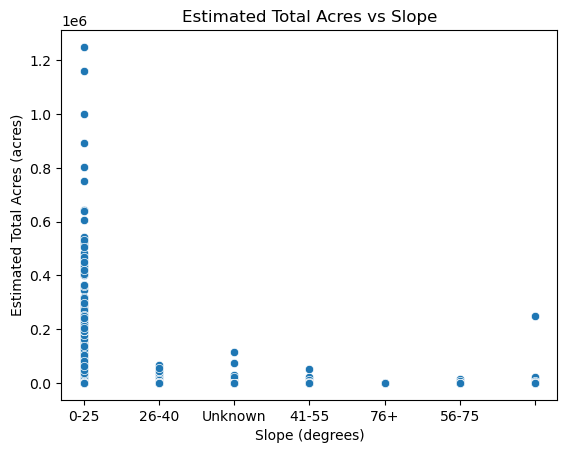

In [21]:
# --- Step 9: Data visualization: relationship between fire area and slope ---
sns.scatterplot(data=df_cleaned, x='ORIGINSLOPE', y='ESTIMATEDTOTALACRES')
plt.title("Estimated Total Acres vs Slope")
plt.xlabel("Slope (degrees)")
plt.ylabel("Estimated Total Acres (acres)")
plt.show()


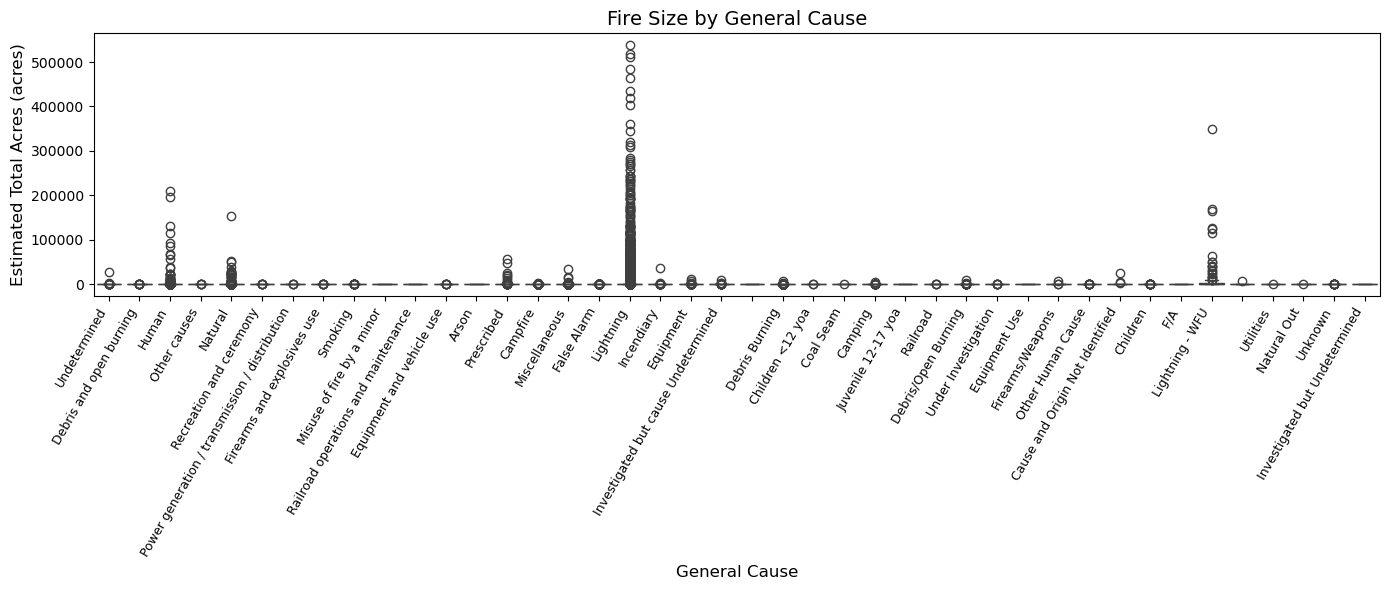

In [32]:
# --- Step 10: Fire Size by General Cause
plt.figure(figsize=(14,6))  # 调宽图形
sns.boxplot(data=df_cleaned, x='GENERALCAUSE', y='ESTIMATEDTOTALACRES')

plt.xticks(rotation=60, ha='right', fontsize=9)  # 旋转标签并右对齐
plt.title("Fire Size by General Cause", fontsize=14)
plt.xlabel("General Cause", fontsize=12)
plt.ylabel("Estimated Total Acres (acres)", fontsize=12)

plt.tight_layout()  # 自动调整布局避免文字被截断
plt.show()


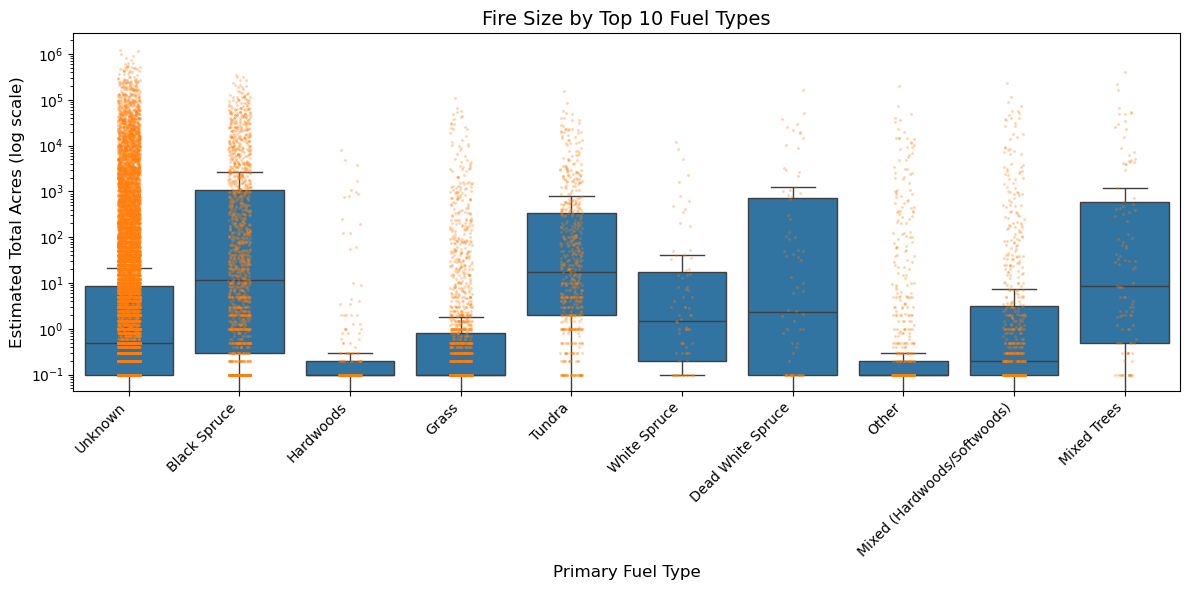

In [36]:
# --- Step 11: Fire Size vs Top 10 Fuel Types ---

df_ft = df_cleaned[['PRIMARYFUELTYPE','ESTIMATEDTOTALACRES']].copy()

# 清理：缺失补 Unknown + value convert
df_ft['PRIMARYFUELTYPE'] = df_ft['PRIMARYFUELTYPE'].fillna('Unknown').astype(str)
df_ft = df_ft[pd.to_numeric(df_ft['ESTIMATEDTOTALACRES'], errors='coerce').notna()]
df_ft = df_ft[df_ft['ESTIMATEDTOTALACRES'] >= 0]

#  Top 10 
top10 = df_ft['PRIMARYFUELTYPE'].value_counts().nlargest(10).index
df_top = df_ft[df_ft['PRIMARYFUELTYPE'].isin(top10)]

# Graph
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x='PRIMARYFUELTYPE', y='ESTIMATEDTOTALACRES', showfliers=False)
sns.stripplot(data=df_top, x='PRIMARYFUELTYPE', y='ESTIMATEDTOTALACRES',
              size=2, alpha=0.35, dodge=True)

plt.yscale('log')  # log size 
plt.xticks(rotation=45, ha='right')
plt.xlabel("Primary Fuel Type", fontsize=12)
plt.ylabel("Estimated Total Acres (log scale)", fontsize=12)
plt.title("Fire Size by Top 10 Fuel Types", fontsize=14)
plt.tight_layout()
plt.show()



# --- Step 12: Interpretation — Fuel Type and Fire Scale Relationship ---
Figure X shows the distribution of estimated burned area (in log scale) across the ten most common primary fuel types in Alaska wildfires.
Among these categories, Black Spruce, Tundra, and Mixed Trees exhibit the largest median burned areas, indicating they are associated with more extensive fire events.
In contrast, Hardwoods and Grass fires tend to be smaller in scale.
The large variance and long upper whiskers for Black Spruce and Tundra suggest that these fuel types are more prone to extreme large-scale fires.
This pattern aligns with ecological observations that black spruce forests and tundra regions accumulate dense organic material, providing highly flammable fuel beds during dry seasons.




In [41]:
# --- Check the list that includes keyword with “fuel”, “vegetation”, “cover”, “plant”  ---
keywords = ['fuel', 'vegetation', 'cover', 'plant']
matches = [col for col in df_cleaned.columns if any(k.lower() in col.lower() for k in keywords)]

print("keywords are related to plant/fuel：")
for m in matches:
    print("-", m)



keywords are related to plant/fuel：
- DISCOVERYDATETIME
- DISCOVERYSIZE
- PRIMARYFUELTYPE


In [43]:
# --- Check what types in  PRIMARYFUELTYPE  ---
unique_types = df_cleaned['PRIMARYFUELTYPE'].dropna().unique()

print("Total found:", len(unique_types), "kinds of fuel type/plant types：")
print(sorted(unique_types)[:20])  # check the first 20 types


Total found: 199 kinds of fuel type/plant types：
['0.1', '1', 'Aspen/Birch', 'B spruce/tundra/w. s', 'B. Spruce', 'B. Spruce/HW', 'BLACK SPRUCE', 'BLACK SPRUCE/HW', 'BLK SPRUCE', 'BLK Spruce', 'BLK Spruce /Tundra', 'BLK Spruce/Hardwood', 'BLK Spruce/Tundra', 'BLK WHT Spruce', 'BLK/WHI Spruce', 'BRUSH', 'BS/Tundra', 'BS/mixed HW', 'Birch tree', 'Black Spr./Hardwood']


In [44]:
df_cleaned['PRIMARYFUELTYPE'].value_counts().head(20)



PRIMARYFUELTYPE
Grass                          1882
Black Spruce                   1692
Unknown                        1040
Other                           822
Mixed (Hardwoods/Softwoods)     663
Tundra                          621
Hardwoods                       222
Mixed Trees                     111
Dead White Spruce                84
White Spruce                     79
Brush                            64
Live White Spruce                48
Aspen/Birch                      30
Tussock                          28
Slash                            23
tundra                            9
BLK Spruce/Tundra                 8
SPRUCE/HARDWOODS                  7
Driftwood                         6
GRASS                             6
Name: count, dtype: int64